In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib. collections import PatchCollection
import sys 
sys.path.append('../../../')
sys.path.append('../')
from build_solver import build_erg_time_opt_solver
from time_opt_erg_lib.obstacle import Obstacle


In [14]:
scale = 100.0
args = {
    'N' : 800, 
    'x0' : np.array([0.02, .02])*scale,
    'xf' : np.array([.988, .920])*scale,
    'erg_ub' : 0.0001,
    'alpha' : 0.9,
    'wrksp_bnds' : np.array([[0.,1.],[0.,1.]])*scale
}

In [15]:
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=20_000, eps=1e-8, alpha=1.00001)

done in  13888  iterations


In [16]:
sol = solver.get_solution()
print(sol['tf'])

48.587082


(0.0, 100.0)

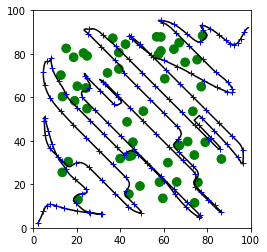

In [17]:
fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')

patches = []
for ob in obs: 
    circ = ob.draw()
    patches.append(circ)

ax.add_collection(PatchCollection(patches, color='g'))
ax.axis('square')
ax.set_xlim(0,1*scale)
ax.set_ylim(0,1*scale)

# plt.savefig('scaled_search_forest.pdf')


In [10]:
import dill as pkl

file = open('./data/forest_sol.pkl', 'wb')
pkl.dump(sol, file)
file.close()

file = open('./data/obs_loc.pkl', 'wb')
pkl.dump(obs, file)
file.close()


Array(50.77798, dtype=float32, weak_type=True)